___
# MINIPROJETO 1

## <font color='red'>Guilherme de Moraes Schoueri</font>
___

## <font color='blue'>Pontos Marcados por Jogo pelo jogador da NBA: Carmelo Anthony</font>

___
### Itens 1 a 3 - Resolução:

In [150]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats

print('Esperamos trabalhar no diretório')
print(os.getcwd())

carm = pd.read_table('carmelo2010-16.txt', sep=",")

Esperamos trabalhar no diretório
C:\Users\Guilherme Moraes\Desktop\CDEng-master\aula02\miniProjeto1


In [152]:
for i in range(len(carm.PTS)):
    if carm.PTS[i] == "Did Not Play" or carm.PTS[i] == "Inactive" or carm.PTS[i] == "Player Suspended":
        carm.PTS[i] = 999

for i in range (len(carm.PTS)):
    carm.PTS[i] = float(carm.PTS[i])


C:\Users\Guilherme Moraes\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Guilherme Moraes\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [153]:
pontos = carm.PTS[(carm.PTS != 999)]

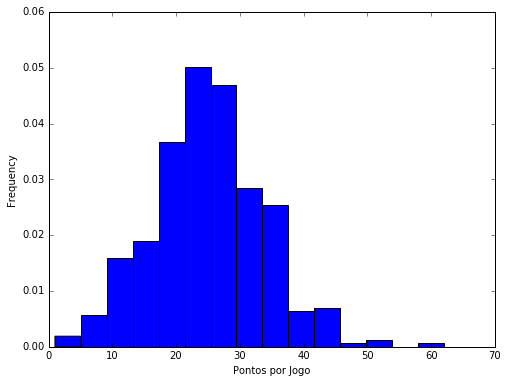

In [167]:
pontos.plot.hist(bins=15, normed=True, figsize=(8, 6))
plt.xlabel("Pontos por Jogo")

In [168]:
ls = list(pontos)

soma = 0

for i in ls:
    soma += float(i)

media = soma/len(ls)

media

25.221649484536083

In [169]:
soma = 0

for i in ls:
    soma += (i - media)**2

desvio = (soma/len(ls))**(1/2)

desvio

8.619227209650088

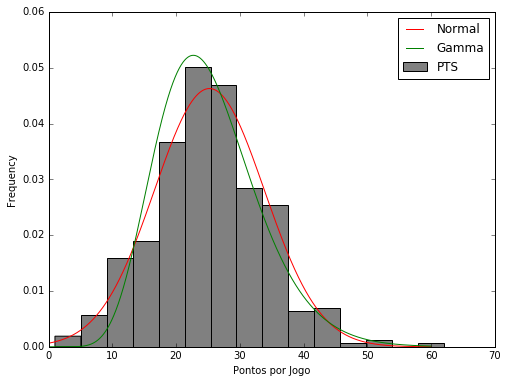

In [195]:
x = np.arange(0, 60, 0.01)

pontos.plot.hist(bins=15, normed=True, figsize=(8, 6), color="grey")
plt.plot(x, stats.norm.pdf(x, loc=media, scale=desvio), '-', color="red", label='Normal')
plt.xlabel("Pontos por Jogo")


# k para a gamma é escolhido entre 1 e 2 baseado na forma do histograma e no efeito que k tem na forma da gamma
k_gamma = 10

# Estimamos theta da distribuição gamma
theta_gamma = media/k_gamma

gamma = stats.gamma.pdf(x, scale=theta_gamma, loc=0, a=k_gamma)

plt.plot(x, gamma, '-', color='green', label="Gamma") # Plota a gamma teórica

plt.legend()

___
### Itens 4 a 6 - Resolução:

___
### Itens 7 a 9 - Resolução:

___
### Itens 10 e 11 - Resolução: